In [53]:
# import relevant modules
import numpy as np
import math
import matplotlib.pyplot as plt

In [54]:
# Define the ODE we wish to solve
def f(x,t):
    return x

In [55]:
def euler_solve_step(fun,h,t,x):
    """
    A function that performs a single step of the euler method

    Parameters
    ----------
    fun : function
        The ODE we wish to solve. The ode function should take
        a single parameter (the state vector) and return the
        right-hand side of the ODE as a numpy.array.
        
    h : value(int or float)
        step_size
    
    t:  value(int or float)
        the initial time
    
    x: value(int or float)
        The initial condition for the ODE.

    Returns
    -------
    Returns the value of x after a single step of the euler method 
    """    
    
    x = x + h*fun(x,t)
    return  x

In [56]:
def rk4_solve_step(fun,h,t,x):
    """
    A function that performs a single step of the 4th-order Runge-Kutta method

    Parameters
    ----------
    fun : function
        The ODE we wish to solve. The ode function should take
        a single parameter (the state vector) and return the
        right-hand side of the ODE as a numpy.array.
        
    h : value(int or float)
        step_size
    
    t:  value(int or float)
        the initial time
    
    x: value(int or float)
        The initial condition for the ODE.

    Returns
    -------
    Returns the value of x after a single step of the 4th-order Runge-Kutta method 
    """
    k1 = fun(x,t)
    k2 = fun( x + h*(k1/2),t + h/2)
    k3 = fun( x + h*(k2/2),t + h/2)
    k4 = fun( x +h*k3,t + h)
    return  x + (1/6)*h*(k1 + 2*k2 + 2*k3 + k4)

In [57]:
def heuns_solve_step(fun,h,t,x):
    """
    A function that performs a single step of the Heun's method

    Parameters
    ----------
    fun : function
        The ODE we wish to solve. The ode function should take
        a single parameter (the state vector) and return the
        right-hand side of the ODE as a numpy.array.
        
    h : value(int or float)
        step_size
    
    t:  value(int or float)
        the initial time
    
    x: value(int or float)
        The initial condition for the ODE.

    Returns
    -------
    Returns the value of x after a single step of the Heun's method 
    """
    f1 = fun(x,t)
    f2 = fun( x + h*(2/3),t + h*(2/3)*f1)
    return  x + h*(f1 + 3*f2)/4

In [58]:
def midpoint_solve_step(fun,h,t,x):
    """
    A function that performs a single step of the Midpoint method

    Parameters
    ----------
    fun : function
        The ODE we wish to solve. The ode function should take
        a single parameter (the state vector) and return the
        right-hand side of the ODE as a numpy.array.
        
    h : value(int or float)
        step_size
    
    t:  value(int or float)
        the initial time
    
    x: value(int or float)
        The initial condition for the ODE.

    Returns
    -------
    Returns the value of x after a single step of the Midpoint method 
    """
    x = x + (h*fun(x+(h/2), t +(h/2)*fun(x,t)))
    return  x 

In [81]:
deltat_max = 1

def solve_to(f,h,t0,u0,T,solver):
    """
    A function that uses a specified 1-step integration method to solve steps of an ODE.

    Parameters
    ----------
    fun : function
        The ODE we wish to solve. The ode function should take
        a single parameter (the state vector) and return the
        right-hand side of the ODE as a numpy.array.
        
    h : value(int or float)
        step_size
    
    t0:  value(int or float)
        the initial time
    
    u0: value(int or float)
        The initial condition for the ODE.
        
    T: value(int or float)
        The maximum steps
    
    Solver: function
            The numerical integration method used to solve the ODE. Specify 
            'euler_solve_step' for the Euler method, 'rk4_solve_step' for the 
            4th-order Runge-Kutta method, 'heuns_solve_step' for the Heuns method
            or 'midpoint_solve_step' for the midpoint method.
            


    Returns
    -------
    Returns the numerical solution estimates of ODE between 
    x1 at t1 and x2 at t2. 
    """
    
    if h > deltat_max:
        print('The step-size specified is too large')
    else:
        while t0+h < T:
            u0=solver(f,h,t0,u0)
            t0 = t0 + h
        if T!=t0:
            u0=solver(f,T-t0,t0,u0)
            t0 = T
        return u0

In [84]:
 solve_to(f,0.1,0,1,1,euler_solve_step)

2.5937424601000005

In [83]:
def solve_ode(fun,h,t0,u0,L,solver):
    
    """
    A function that uses a specified 1-step integration method to solve a specified ODE.

    Parameters
    ----------
    fun : function
        The ODE we wish to solve. The ode function should take
        a single parameter (the state vector) and return the
        right-hand side of the ODE as a numpy.array.
        
    h : value(int or float)
        step_size
    
    t0:  value(int or float)
        the initial time
    
    u0: value(int or float)
        The initial condition for the ODE.
        
    L: 
    
    Solver: function
            The numerical integration method used to solve the ODE. Specify 
            'euler_solve_step' for the Euler method, 'rk4_solve_step' for the 
            4th-order Runge-Kutta method, 'heuns_solve_step' for the Heuns method
            or 'midpoint_solve_step' for the midpoint method.
            


    Returns
    -------
    Returns a numpy.array containing the numerical solution estimates of ODE
    for the specified time interval as well as the error. 
    """    
    
    m = []
    for l in L:
        u0 = solve_to(fun,h,t0,u0,l,solver)
        t0=l
        m.append(u0)
    error = abs(math.exp(l)-u0)
    return m, error


In [74]:
# finding a step size for each method when the error is the same (to 4sf)
# error is  0.0006345 for all these timesteps
#Euler
x = solve_ode(f,0.00046717,0,1,[0.1,0.6,1],euler_solve_step)
#Rk4
y = solve_ode(f,0.99000,0,1,[0.1,0.6,1],rk4_solve_step)
#Heuns
n=solve_ode(f,0.0012719,0,1,[0.1,0.6,1],heuns_solve_step)
#Midpoint
p=solve_ode(f,0.0012719,0,1,[0.1,0.6,1],midpoint_solve_step)



In [70]:
# finding the time elapsed 
import time
start = time.time()
n=solve_ode(f,0.0012719,0,1,[0.1,0.6,1],midpoint_solve_step)
end = time.time()
print(end - start)

0.0005412101745605469


In [75]:
solve_ode(f,0.1,0,1,[0.1,0.6,1],euler_solve_step)

([1.1, 1.7715610000000002, 2.5937424601000005], 0.12453936835904456)

Text(0, 0.5, 'error')

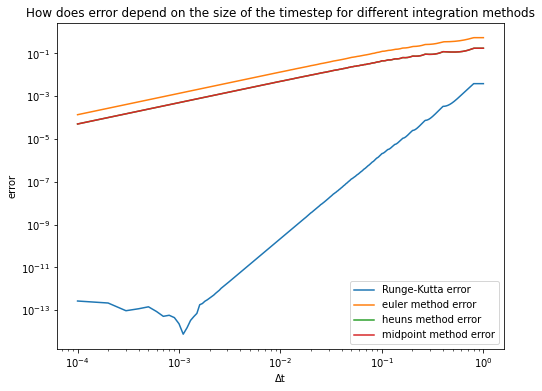

In [76]:
#Produce a plot with double logarithmic scale showing how the error depends on the size of the timestep 
# for the euler method, 4th order Runge-Kutta method, Heun's method and Midpoint method
error_euler = []
error_runga = []
error_heuns = []
error_midpoint = []
error_rk3 = []
for h in np.arange(0.0001,1,0.0001):
    [a,b]= solve_ode(f,h,0,1,[0.1,0.9,1],euler_solve_step)
    [i,j]= solve_ode(f,h,0,1,[0.1,0.9,1],rk4_solve_step)
    [n,k]= solve_ode(f,h,0,1,[0.1,0.9,1],heuns_solve_step)
    [y,q]= solve_ode(f,h,0,1,[0.1,0.9,1],midpoint_solve_step)
    [h,u]= solve_ode(f,h,0,1,[0.1,0.9,1],rk3_solve_step)
    error_euler.append(b)
    error_runga.append(j)
    error_heuns.append(k)
    error_midpoint.append(q)
    error_rk3.append(u)

fig=plt.figure(figsize=(8,6))    
plt.loglog(np.arange(0.0001,1,0.0001), error_runga)
plt.loglog(np.arange(0.0001,1,0.0001), error_euler)
plt.loglog(np.arange(0.0001,1,0.0001), error_heuns)
plt.loglog(np.arange(0.0001,1,0.0001), error_midpoint)
#plt.loglog(np.arange(0.0001,1,0.0001), error_rk3)
#plt.axhline(y=0.0006342732424382547, color='g')


plt.legend(['Runge-Kutta error','euler method error','heuns method error', 'midpoint method error'])
plt.title('How does error depend on the size of the timestep for different integration methods')
plt.xlabel('\u0394t')
plt.ylabel('error')


In [65]:
# Define a system of ODEs

def fun(X,t):
    x = X[0]
    y = X[1]
    return np.array([y,-x])

In [66]:
# function to solve systems of ODEs
def solve_ode_system(fun,h,t,u0,L,solver='rk4_solve_step'):
    """
    A function that uses a specified 1-step integration method to solve a system
    of specified ODE's.

    Parameters
    ----------
    fun : function
        The system of ODE's we wish to solve. The ode function should take
        a single parameter (the state vector) and return the
        right-hand side of the ODE as a numpy.array.
        
    h : value(int or float)
        step_size
    
    t:  value(int or float)
        the initial time
    
    u0:  numpy.array
        The initial conditions for the ODE.
        
    L: 
    
    Solver: function
            The numerical integration method used to solve the ODE. Specify 
            'euler_solve_step' for the Euler method, 'rk4_solve_step' for the 
            4th-order Runge-Kutta method, 'heuns_solve_step' for the Heuns method
            or 'midpoint_solve_step' for the midpoint method.
            


    Returns
    -------
    Returns a list of numpy.arrays containing the x and y numerical solution estimates to the
    system of ODE's for the specified time interval. 
    """    
     # adding tests to check that the code handles errors gracefully
    #if solver != 'euler_solve_step': #or 'rk4_solve_step' or 'heuns_solve_step' or 'midpoint_solve_step':
        #print("INVALID SOLVER. Please specify: euler_solve_step, rk4_solve_step, heuns_solve_step or midpoint_solve_step")
    #else:
    
    
    m = []
    for l in L:
        u0 = solve_to(fun,h,t,u0,l,solver)
        t=l
        m.append(u0)
    return m
    


In [67]:
solve_ode_system(fun,0.1,0,[1,1],[0.3,0.9,1],euler_solve_step)

[array([1.269, 0.671]),
 array([ 1.46977249, -0.16474031]),
 array([ 1.45329846, -0.31171756])]

In [18]:
# Define the exact solution of the ODE we wish to solve
def x_exact(t):
    return np.cos(t) + np.sin(t)

In [19]:
def xdot_exact(t):
    return -np.sin(t) + np.cos(t)

Text(0.5, 1.0, 'Graph displaying the solution of the system of ODEs')

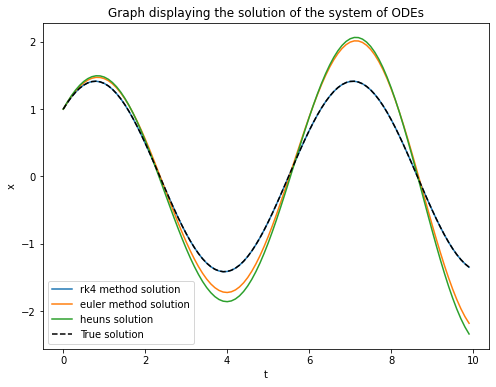

In [20]:
#Plotting the results of system of ODEs
t = np.arange(0,10,0.1)
results_euler = solve_ode_system(fun,0.1,0,[1,1],t,euler_solve_step)
results_rk4 = solve_ode_system(fun,0.1,0,[1,1],t,rk4_solve_step)
results_heuns = solve_ode_system(fun,0.1,0,[1,1],t,heuns_solve_step)
fig=plt.figure(figsize=(8,6)) 
plt.plot(t,[state[0] for state in results_rk4])
plt.plot(t,[state[0] for state in results_euler])
plt.plot(t,[state[0] for state in results_heuns])
plt.plot(t,x_exact(t),'k--')
plt.legend(['rk4 method solution','euler method solution','heuns solution','True solution'])
plt.xlabel('t')
plt.ylabel('x')
plt.title('Graph displaying the solution of the system of ODEs')



In [ ]:
#Plotting the results of system of ODEs
t = np.arange(0,10,0.1)
results_euler = solve_ode_system(fun,0.1,0,[1,1],t,euler_solve_step)
results_rk4 = solve_ode_system(fun,0.1,0,[1,1],t,rk4_solve_step)
results_heuns = solve_ode_system(fun,0.1,0,[1,1],t,heuns_solve_step)

fig=plt.figure(figsize=(8,6)) 
plt.plot([state[0] for state in results_euler],[state[1] for state in results_euler])
plt.plot([state[0] for state in results_rk4],[state[1] for state in results_rk4],'r')
plt.plot([state[0] for state in results_heuns],[state[1] for state in results_heuns])
plt.plot(x_exact(t),xdot_exact(t),'k--')

plt.legend(['euler method error','Runge-Kutta error','Heuns method','True value'])
plt.xlabel('x')
plt.ylabel('x\u0307')
plt.title('Graph displaying the solution of the system of ODEs')




In [ ]:
# note that if big time-steps are used over a long period of time, the euler method and heuns method sprial outwards away from the true solution